In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./allendata/df.csv')

In [54]:
print(df.head().to_string())

    spike_time  stimulus_presentation_id    unit_id  time_since_stimulus_presentation_onset  stimulus_block   start_time    stop_time  contrast  spatial_frequency  phase            size  orientation    stimulus_name  duration  stimulus_condition_id  waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  cluster_id  cumulative_drift   d_prime  firing_rate  isi_violations  isolation_distance   L_ratio  local_index  max_drift  nn_hit_rate  nn_miss_rate  peak_channel_id  presence_ratio  waveform_recovery_slope  waveform_repolarization_slope  silhouette_score       snr  waveform_spread  waveform_velocity_above  waveform_velocity_below  waveform_duration                                              filtering  probe_channel_number  probe_horizontal_position   probe_id  probe_vertical_position structure_acronym  ecephys_structure_id ecephys_structure_acronym  anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  left_right_ccf_coordinate probe_description                 location

In [5]:
df.columns

Index(['spike_time', 'stimulus_presentation_id', 'unit_id',
       'time_since_stimulus_presentation_onset', 'stimulus_block',
       'start_time', 'stop_time', 'contrast', 'spatial_frequency', 'phase',
       'size', 'orientation', 'stimulus_name', 'duration',
       'stimulus_condition_id', 'waveform_PT_ratio', 'waveform_amplitude',
       'amplitude_cutoff', 'cluster_id', 'cumulative_drift', 'd_prime',
       'firing_rate', 'isi_violations', 'isolation_distance', 'L_ratio',
       'local_index', 'max_drift', 'nn_hit_rate', 'nn_miss_rate',
       'peak_channel_id', 'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anter

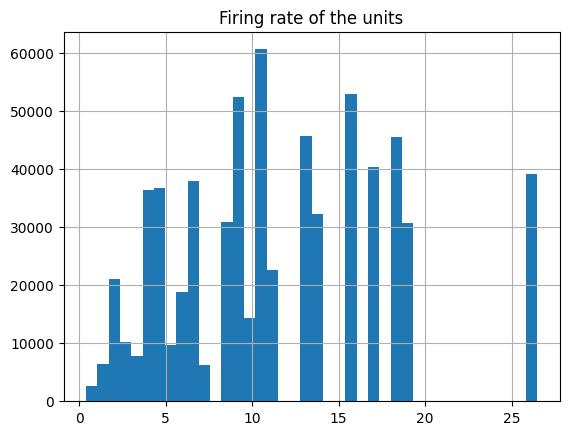

In [ ]:
df['firing_rate'].hist(bins=40)
plt.title("Firing rate of the units")
plt.show()

In [21]:
import matplotlib.pyplot as plt

df_unit = df.groupby('unit_id')
units_df = pd.DataFrame(df['unit_id'].unique(), columns=['unit_id'])

units_df['mean'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['firing_rate'].mean())
units_df['var'] = units_df['unit_id'].apply(lambda x: df_unit.get_group(x)['firing_rate'].var())

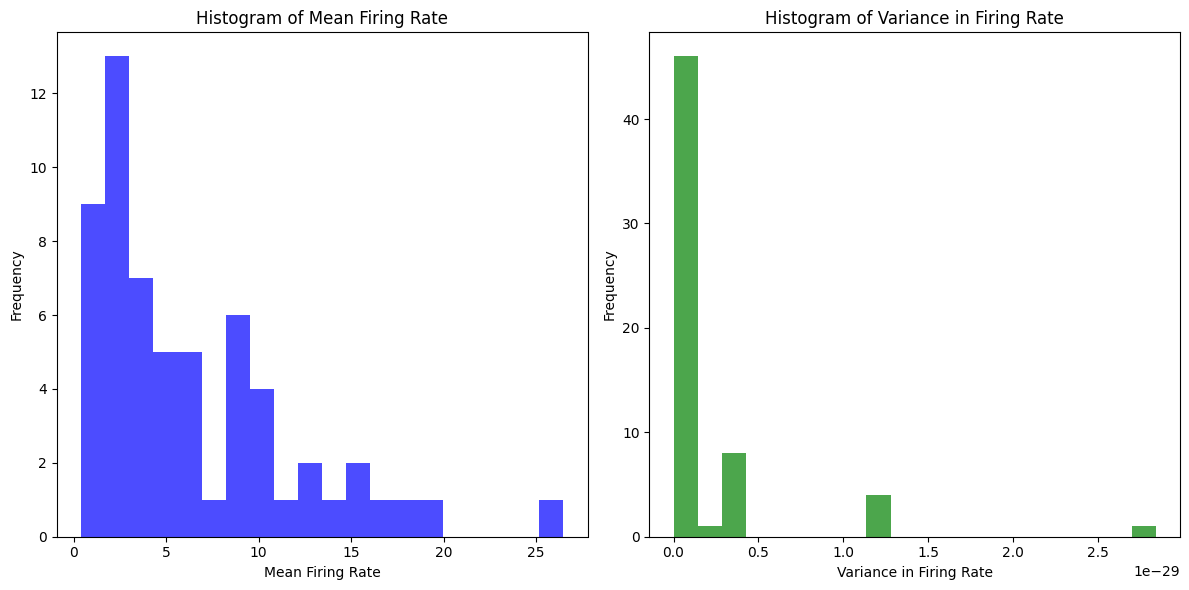

In [22]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'mean'
axes[0].hist(units_df['mean'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Mean Firing Rate')
axes[0].set_xlabel('Mean Firing Rate')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'var'
axes[1].hist(units_df['var'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of Variance in Firing Rate')
axes[1].set_xlabel('Variance in Firing Rate')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

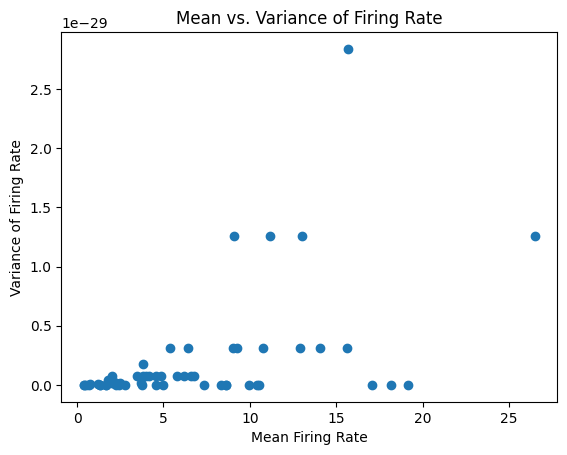

In [23]:
# Scatter plot of mean vs. variance
plt.scatter(units_df['mean'], units_df['var'])
plt.xlabel('Mean Firing Rate')
plt.ylabel('Variance of Firing Rate')
plt.title('Mean vs. Variance of Firing Rate')
plt.show()

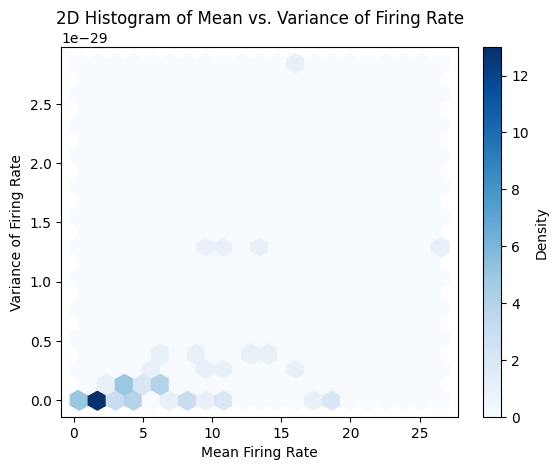

In [16]:
# Create 2D histogram (hexbin plot) for 'mean' vs. 'var'
plt.hexbin(units_df['mean'], units_df['var'], gridsize=20, cmap='Blues')

# Add color bar to indicate density
plt.colorbar(label='Density')

# Set labels and title
plt.xlabel('Mean Firing Rate')
plt.ylabel('Variance of Firing Rate')
plt.title('2D Histogram of Mean vs. Variance of Firing Rate')

# Display the plot
plt.show()

In [46]:
print(f'There are {df["unit_id"].nunique()} unique units in total')
print(f'There are {df["stimulus_presentation_id"].nunique()} unique stimuli')

There are 60 unique units in total
There are 6000 unique stimuli


In [ ]:
# correlation between the units



There are 6000 unique stimuli


In [ ]:
# each stimulus usually covers

stimulus_groups = df.groupby('stimulus_presentation_id')
unique_unit_counts = stimulus_groups['unit_id'].nunique()


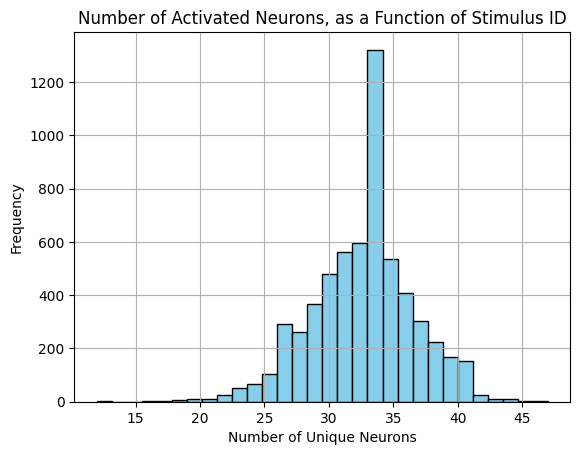

In [ ]:
unique_unit_counts.hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Number of Activated Neurons, as a Function of Stimulus ID')
plt.xlabel('Number of Unique Neurons')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# correlation matrix between neurons



In [ ]:
# compute higher moments